# Project: Weather Prediction using Logistic Regression

Predicting whether it will rain tomorrow using today's weather data

## Getting Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
url='https://raw.githubusercontent.com/Asad-cuet/Machine-Learning-Code/master/dataset/weatherAUS.csv'

In [3]:
import opendatasets as od
od.download(url)

Using downloaded and verified file: ./weatherAUS.csv


In [4]:
import pandas as pd

In [5]:
raw_df=pd.read_csv('weatherAUS.csv')

In [6]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Identifying input and target columns

In [7]:
input_cols=list(raw_df.columns)[1:-1]  # Excluding last column by range [1:-1]. Python range works as like [ , )
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [8]:
target_cols=list(raw_df.columns)[-1]
target_cols

'RainTomorrow'

## Data Preprocessing

### Remove row where target columns is empty

In [9]:
raw_df[target_cols].unique()

array(['No', 'Yes', nan], dtype=object)

See there is nan value

In [10]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [11]:
raw_df[target_cols].unique()

array(['No', 'Yes'], dtype=object)

Now there is no none value

### Spliting Dataset

three parts: <br>
<b>Training Set:</b> Train model, compute loss, execute optimization <br>
<b>Validation Set:</b> Pick best verson of model <br>
<b>Test Set:</b> Compare different models <br>

<b>Explaination:</b>

Split raw dataset into <b>traing validation set</b> and <b>test set</b> in ratio 7:3 .<br>
From traing validation set,split into <b>training set</b> and <b>validation set</b> in ration 7:3<br>
Split traing set into <b>traing input set</b> and <b>traning target set</b> <br>

Note: Here,<br>
traing input set is Training Set <br>
validation set is Validation set <br>
test Set is Test Set <br>


#### df

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_val_df, test_df = train_test_split(raw_df,test_size=0.3,random_state=42)

In [14]:
train_df, val_df = train_test_split(train_val_df,test_size=0.3,random_state=42)

#### inputs & targets

In [15]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

In [16]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()

In [17]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()

### Identify Numeric & Categorical Column

In [18]:
import numpy as np

In [19]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()

In [20]:
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

### Observing input columns

In [21]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,68740.000000,68846.00000,68985.000000,39555.000000,36105.000000,64493.000000,68465.000000,67733.000000,68262.000000,67263.000000,62151.000000,62139.000000,43101.000000,41473.000000,68669.000000,67676.000000
mean,12.187416,23.21404,2.405229,5.467337,7.636305,39.942350,13.985146,18.597168,68.837904,51.519216,1017.667463,1015.277972,4.430454,4.495937,16.981629,21.669772
std,6.400621,7.13213,8.757592,4.199693,3.780028,13.572923,8.885652,8.772176,19.082213,20.860562,7.132095,7.067183,2.888439,2.723230,6.497755,6.952820
min,-8.200000,-4.10000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,982.000000,977.100000,0.000000,0.000000,-7.000000,-5.100000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.20000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,367.600000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.900000,1038.500000,9.000000,9.000000,39.400000,46.700000


In [22]:
train_inputs[categorical_cols].nunique()  # always use nunique() in categorical column

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### Cleaning Numeric Columns

#### Imputation

Model can't work with missing numerical data. The process of filling missing values is called imputation.

In [23]:
# Looking is there missing values
train_inputs[numeric_cols].isna().sum()  # isna() shows all missing data

MinTemp            245
MaxTemp            139
Rainfall             0
Evaporation      29430
Sunshine         32880
WindGustSpeed     4492
WindSpeed9am       520
WindSpeed3pm      1252
Humidity9am        723
Humidity3pm       1722
Pressure9am       6834
Pressure3pm       6846
Cloud9am         25884
Cloud3pm         27512
Temp9am            316
Temp3pm           1309
dtype: int64

Yes. There is missing values

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer=SimpleImputer(strategy='mean') # reaplacing by mean value

In [26]:
imputer.fit(raw_df[numeric_cols])  # computing mean value from entire dataset.Beacause traing set, validation set, test set separated now. 
                                   # Stored is statistics_ 
                                   # You can see by imputer.statistics_

SimpleImputer()

In [27]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])

In [28]:
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])

In [29]:
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [30]:
## checking again, is there missing value?
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Now, There is no missing values <br>

<b>Imputation completed</b>

#### Scaling Values in range 0 to 1

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler=MinMaxScaler()

In [33]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

now you can see min,max value of all columns by scaler.data_min_ , scaler.data_max_

list(scaler.data_min_)

In [34]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])

In [35]:
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])

In [36]:
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

Now all valuse scaled. <br>
You can check it by train_inputs[numeric_cols].describe()
<br>
<b>Scaling Done</b>

### Cleaning Categorical Columns

Converting Categorical data into number using encoder <br>
You can see no. of unique value of all columns by nunique()

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [39]:
encoder.fit(raw_df[categorical_cols].fillna('Unknowns')) # categorical_cols].fillna('Unknowns') replace missing values

OneHotEncoder(handle_unknown='ignore', sparse=False)

You can see: encoder.categories_

In [40]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))  # getting encoded column names

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Now we will create new columns in the dataset

In [41]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [42]:
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [43]:
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


<b> Done </b>
<br>
You can see in the dataset

### Saving Preprocessing Data. Optional

In [44]:
pd.DataFrame(train_inputs).to_csv('train_inputs.csv')

In [45]:
pd.DataFrame(val_inputs).to_csv('val_inputs.csv')

In [46]:
pd.DataFrame(test_inputs).to_csv('test_inputs.csv')

Saved in file <br>
You can read by pd.read_csv('train_inputs.csv')

## Making & Training Model

In [47]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression(solver='liblinear')   #making

In [48]:
model.fit(train_inputs[numeric_cols+encoded_cols],train_targets)  #  training

LogisticRegression(solver='liblinear')

## Making Prediction

In [49]:
X_train=train_inputs[numeric_cols+encoded_cols]

In [50]:
X_val=val_inputs[numeric_cols+encoded_cols]

In [51]:
X_test=test_inputs[numeric_cols+encoded_cols]

In [52]:
train_preds=model.predict(X_train)  # and the train target is train_targets

In [53]:
val_preds=model.predict(X_val)  # and the train target is  val_targets

In [54]:
test_preds=model.predict(X_test)  # and the train target is  test_targets

## Testing: Comparing traning prediction with target values

### Accuracy and Confusion Matrix

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(train_targets,train_preds)

0.8524606798579402

In [57]:
# also you can see prediction matrix
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.94716574, 0.05283426],
       [0.48174895, 0.51825105]])

Do google to know about confusion matrix.<br>

Summering:<br>
Left top value is fraction of 'No' result, which macthed with target value <br>
Right bottom value is fraction of 'Yes' result, which macthed with target value <br>

In [59]:
# lets do of others
accuracy_score(val_targets,val_preds)

0.8489768307119905

In [60]:
confusion_matrix(val_targets,val_preds,normalize='true')

array([[0.94815974, 0.05184026],
       [0.4993895 , 0.5006105 ]])

In [61]:
accuracy_score(test_targets,test_preds)

0.8470061794161517

In [62]:
confusion_matrix(test_targets,test_preds,normalize='true')

array([[0.94585619, 0.05414381],
       [0.49750451, 0.50249549]])

### Visualized Confusion Matrix by defined function

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.25%


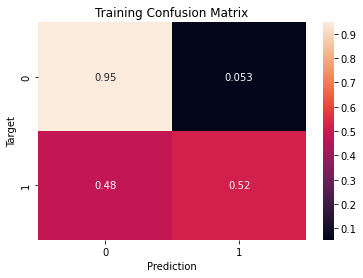

In [64]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 84.90%


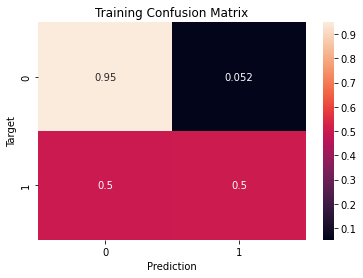

In [65]:
train_preds = predict_and_plot(X_val, val_targets, 'Training')

Accuracy: 84.70%


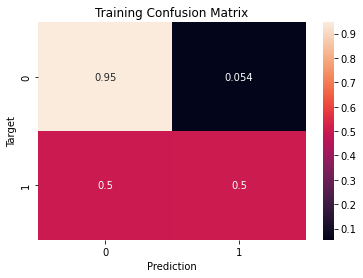

In [66]:
train_preds = predict_and_plot(X_test, test_targets, 'Training')

### Explaination

#### Confusion Matrix

Results Explained <br>
The Confusion Matrix created has four different quadrants: <br>

<b>True Negative</b> (Top-Left Quadrant) <br>
<b>False Positive</b> (Top-Right Quadrant) <br>
<b>False Negative</b> (Bottom-Left Quadrant) <br>
<b>True Positive</b> (Bottom-Right Quadrant) <br>
True means that the values were accurately predicted, False means that there was an error or wrong prediction.

#### Accuracy

Accuracy measures how often the model is correct. <br>

<b>Formula:</b> (True Positive + True Negative) / Total Predictions


#### Precision

It measures what percentage is truly positive. <br>

<b>Formula:</b> True Positive / (True Positive + False Positive)

#### Sensitivity (Recall)

It measures what percentage are predicted positive <br>

<b>Formula:</b> True Positive / (True Positive + False Negative)

#### Specificity

It shows How well the model is at prediciting negative results <br>

<b>Formula:</b> True Negative / (True Negative + False Positive)

#### F-score

F-score is the "harmonic mean" of precision and sensitivity. <br>

It considers both false positive and false negative cases and is good for imbalanced datasets. <br>

<b>Formula:</b> 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))

## Prediction on single input

### Take Input

In [67]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

### Preprocess the input

In [68]:
new_input_df=pd.DataFrame([new_input])

In [69]:
new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols]) # imputing

In [70]:
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols]) # scaling

In [71]:
new_input_df[encoded_cols]=encoder.transform(new_input_df[categorical_cols]) # encoding

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


### Predicting

In [72]:
X_new_input=new_input_df[numeric_cols+encoded_cols]

In [73]:
preidiction=model.predict(X_new_input)[0]
preidiction

'Yes'

In [74]:
probability=model.predict_proba(X_new_input)[0]
probability

array([0.31309278, 0.68690722])